🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

Multi class classification with a perfect data preprocessing and using 8 models (classifiers) for UCI Heart Disease Data.
Classifiers(DT,RF,XGB,KNN,GB,SVM,SVM_linear,SVM_rbf)

By:Mahmoud Mohamed Rady

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

# import preprocessing
from sklearn.preprocessing import LabelEncoder

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease_uci.csv')


In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape
print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

There are 920 patients and 16 features in the dataset.


In [5]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
statistical_summary = df.describe()
statistical_summary

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
num = df['num'].value_counts()
print(num)

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart Disease Frequency')

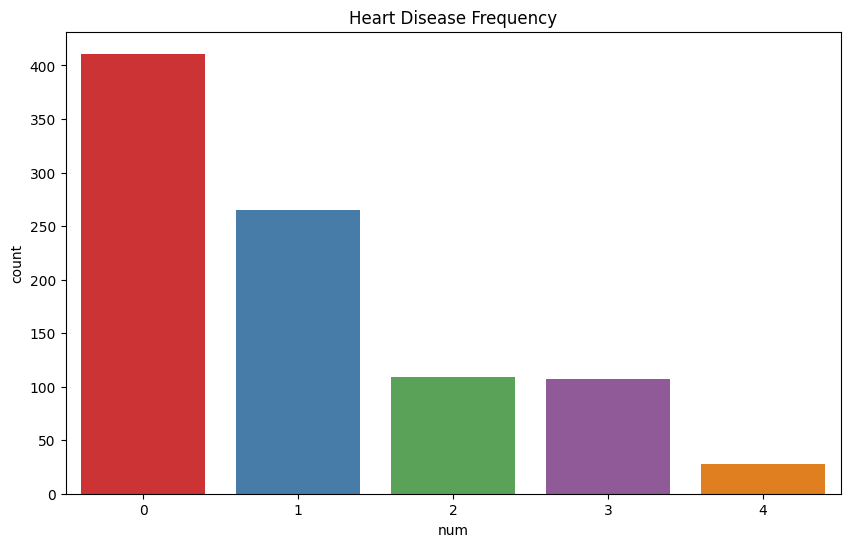

In [10]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='num',data=df, palette='Set1')
plt.title('Heart Disease Frequency')

In [36]:
max_age= df['age'].max()
min_age= df['age'].min()
print("Observation: ".upper())
print("---")
print(f"Max age of the patient: {max_age}")
print(f'Min age of the patient: {min_age}')
print(f"So, the age of the patient is between {min_age} and {max_age}")

OBSERVATION: 
---
Max age of the patient: 77
Min age of the patient: 28
So, the age of the patient is between 28 and 77


Text(0.5, 1.0, 'Distribution of Age')

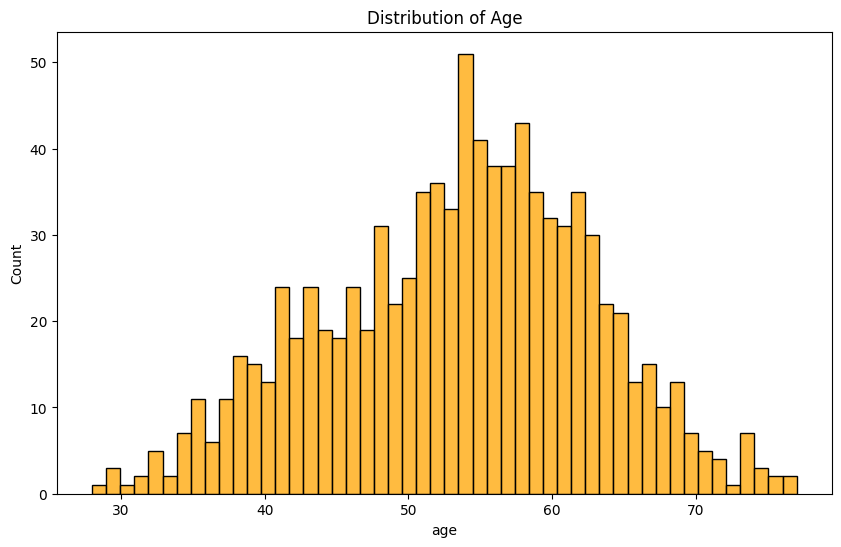

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], color='orange', bins=50)
plt.title('Distribution of Age')

In [14]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Chest Pain Type')

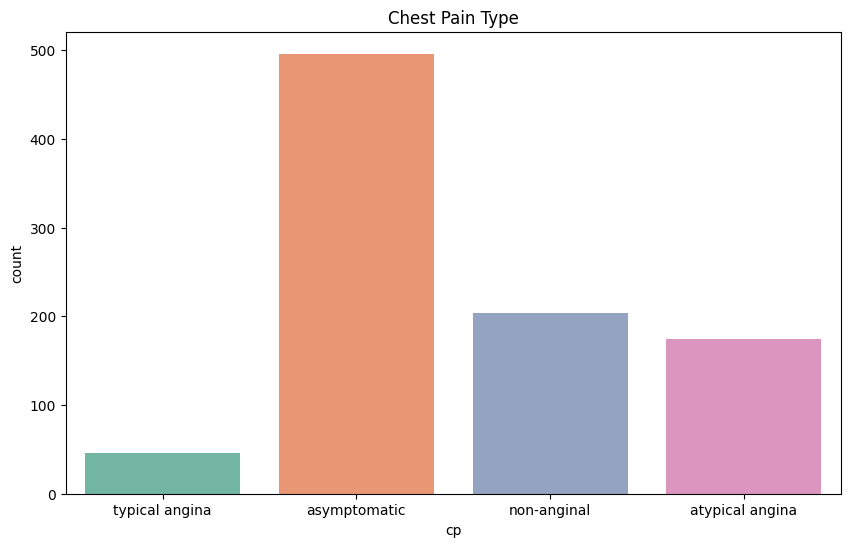

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='cp',data=df, palette='Set2')
plt.title('Chest Pain Type')

In [35]:
max_trestbps = df['trestbps'].max()
min_trestbps= df['trestbps'].min()
print("Observation: ".upper())
print("---")
print(f"Max trestbps of the patient: {max_trestbps}")
print(f'Min trestbps of the patient: {min_trestbps}')

OBSERVATION: 
---
Max trestbps of the patient: 200.0
Min trestbps of the patient: 0.0


Text(0.5, 1.0, 'Resting Blood Pressure')

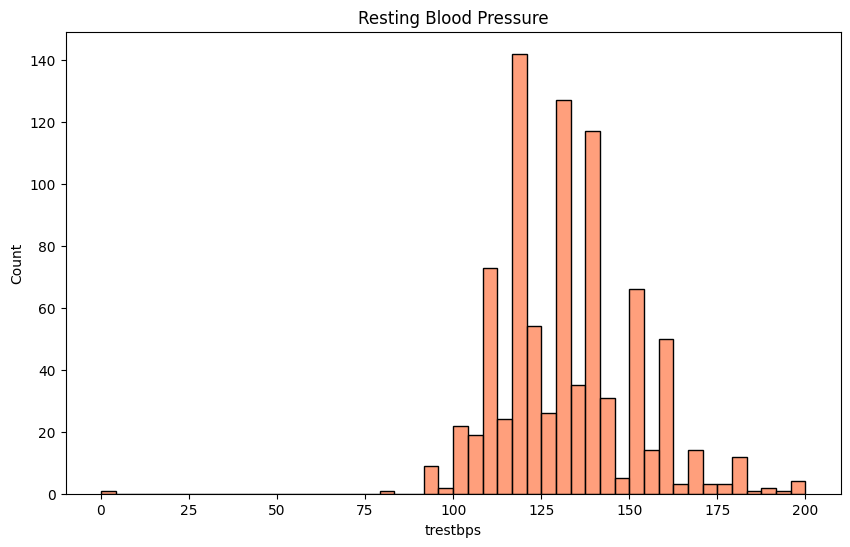

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['trestbps'], color='coral') 
plt.title('Resting Blood Pressure')

In [34]:
max_chol = df['chol'].max()
min_chol= df['chol'].min()
print("Observation: ".upper())
print("---")
print(f"Max Cholestrol of the patient: {max_chol}")
print(f'Min Cholestrol of the patient: {min_chol}')

OBSERVATION: 
---
Max Cholestrol of the patient: 603.0
Min Cholestrol of the patient: 0.0


Text(0.5, 1.0, 'Cholestrol')

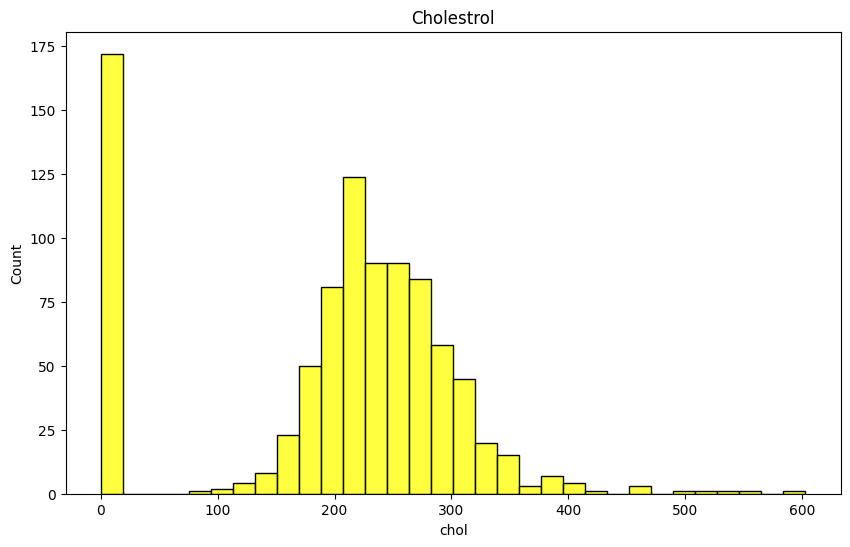

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['chol'], color='yellow')
plt.title('Cholestrol')

In [26]:
df['fbs'].value_counts()

fbs
False    692
True     138
Name: count, dtype: int64

Text(0.5, 1.0, 'Fasting Blood Sugar')

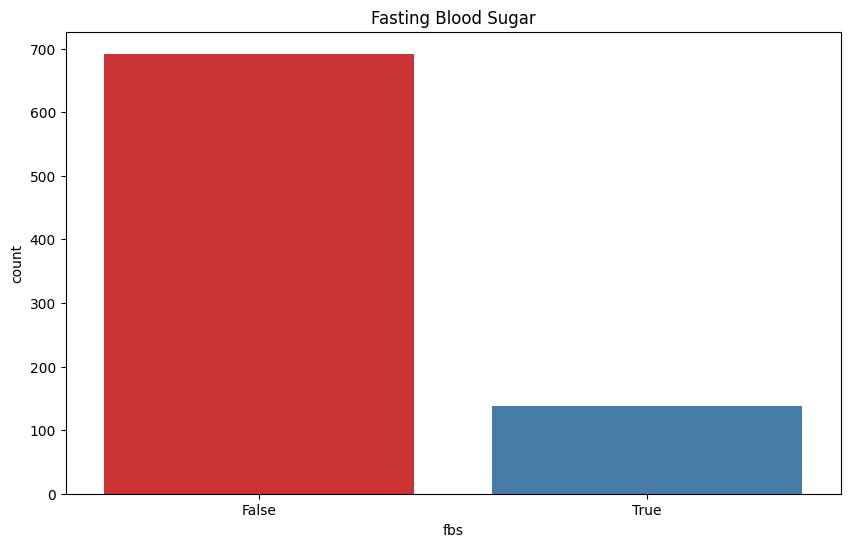

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='fbs',data=df, palette='Set1')
plt.title('Fasting Blood Sugar')

In [28]:
df['restecg'].value_counts()

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Text(0.5, 1.0, 'Resting Electrocardiographic Results')

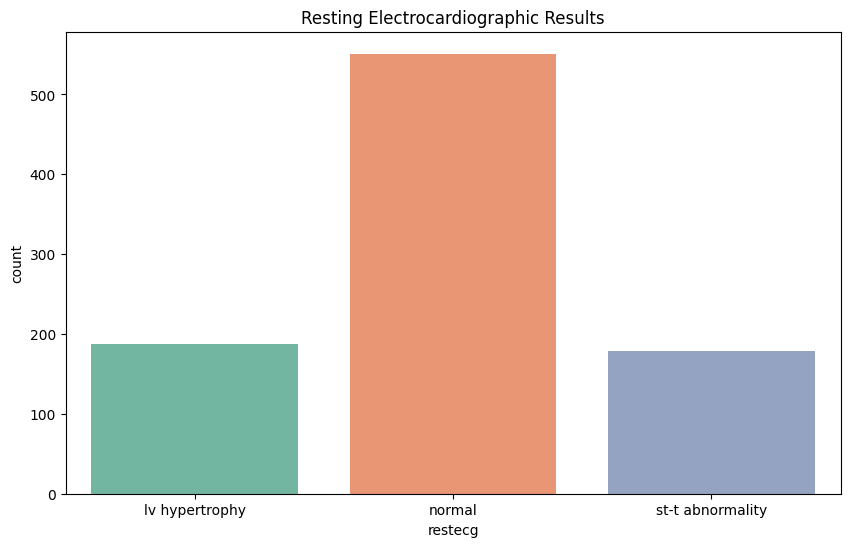

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='restecg',data=df, palette='Set2')
plt.title('Resting Electrocardiographic Results')

In [33]:
max_thalch = df['thalch'].max()
min_thalch= df['thalch'].min()
print("Observation: ".upper())
print("---")
print(f"Max heart rate of the patient: {max_thalch}")
print(f'Min heart rate of the patient: {min_thalch}')

OBSERVATION: 
---
Max heart rate of the patient: 202.0
Min heart rate of the patient: 60.0


Text(0.5, 1.0, 'Maximum Heart Rate Achieved')

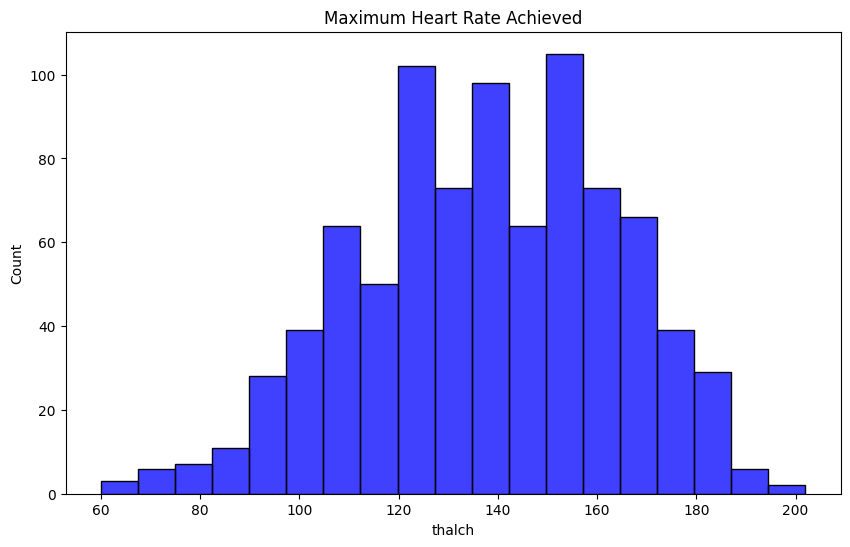

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(df['thalch'], color='blue')
plt.title('Maximum Heart Rate Achieved')

In [37]:
df['exang'].value_counts()

exang
False    528
True     337
Name: count, dtype: int64

Text(0.5, 1.0, 'Exercise Induced Angina')

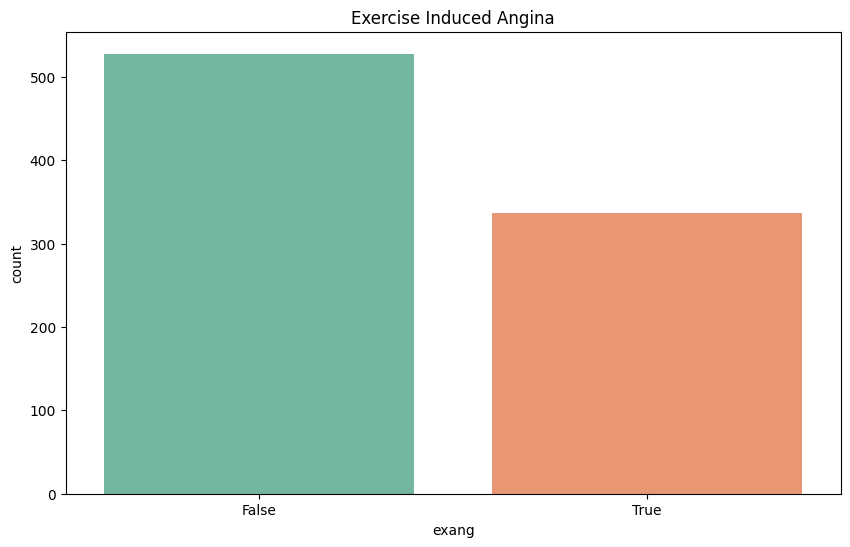

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='exang',data=df, palette='Set2')
plt.title('Exercise Induced Angina')

In [40]:
max_oldpeak= df['oldpeak'].max()
min_oldpeak= df['oldpeak'].min()
print("Observation: ".upper())
print("---")
print(f"Max oldpeak of the patient: {max_oldpeak}")
print(f'Min oldpeak of the patient: {min_oldpeak}')

OBSERVATION: 
---
Max oldpeak of the patient: 6.2
Min oldpeak of the patient: -2.6


Text(0.5, 1.0, 'ST Depression Induced by Exercise Relative to Rest')

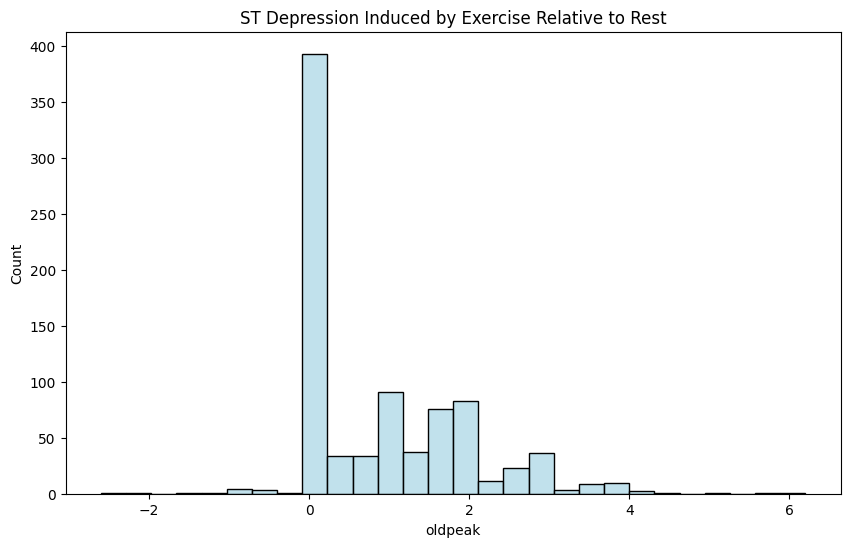

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(df['oldpeak'], color='lightblue')
plt.title('ST Depression Induced by Exercise Relative to Rest')

In [43]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

In [44]:
df['ca'].value_counts()


ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Major Vessels')

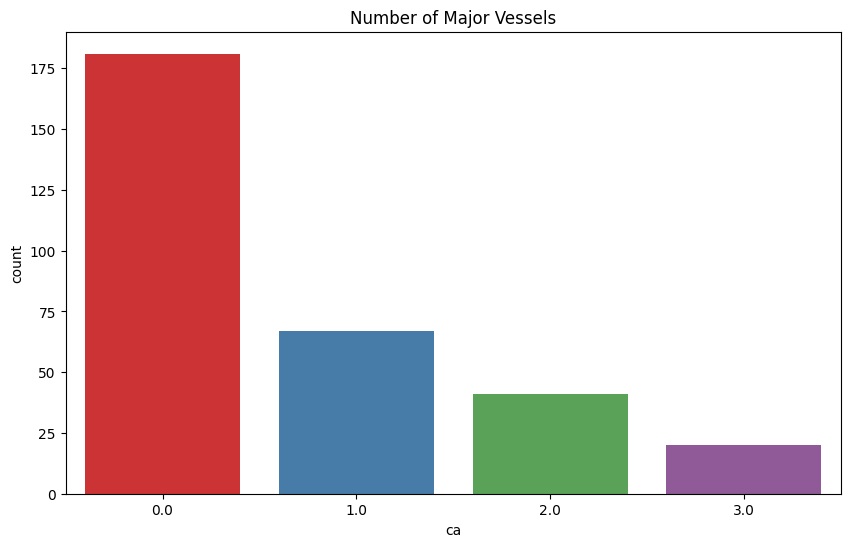

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x='ca',data=df, palette='Set1')
plt.title('Number of Major Vessels')

In [47]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

Text(0.5, 1.0, 'Thal')

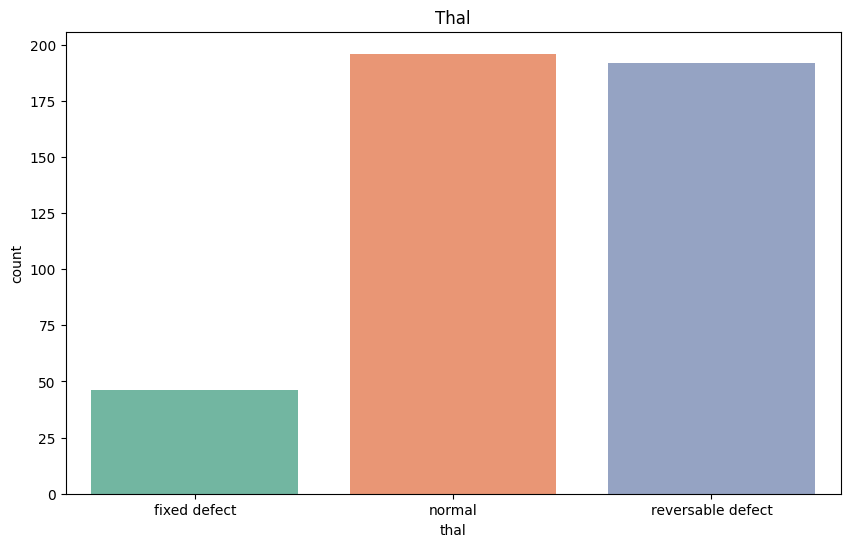

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='thal',data=df, palette='Set2')
plt.title('Thal')

Text(0.5, 1.0, 'Missing Values')

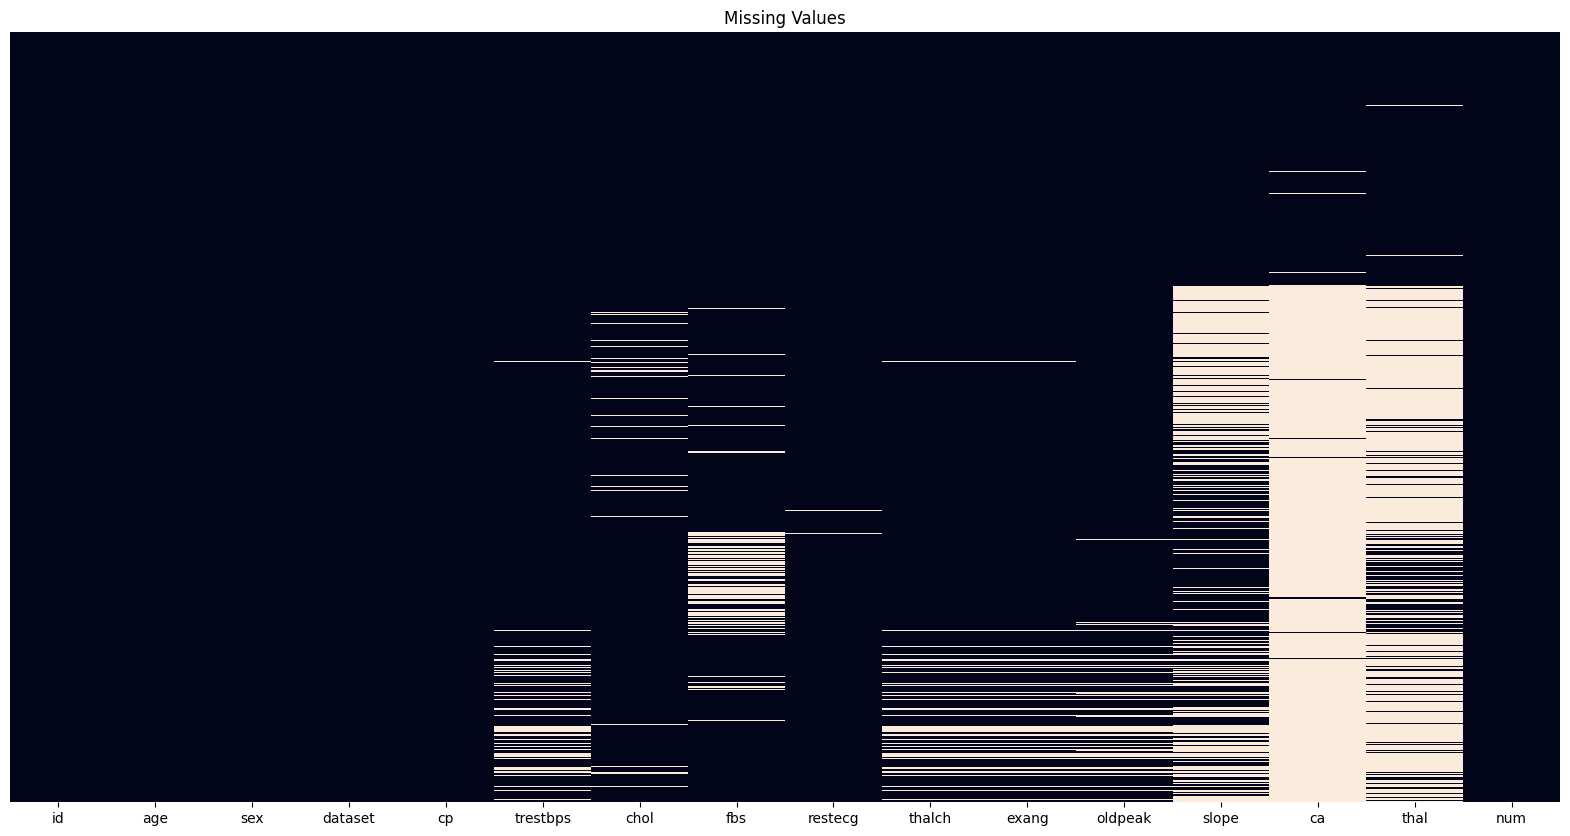

In [49]:
# Let's make a plot to see the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values')

In [50]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)


ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

In [51]:
# Drop the column 'id' and 'dataset'from the dataframe.
df.drop(['id'], axis=1, inplace=True)
df.drop(['dataset'], axis=1, inplace=True)

In [52]:
from sklearn.impute import SimpleImputer

# impute restecg column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='most_frequent')
df[['restecg']] = imputer.fit_transform(df[['restecg']])

# impute chol column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df[['chol']] = imputer.fit_transform(df[['chol']])

# impute exang column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='most_frequent')
df[['exang']] = imputer.fit_transform(df[['exang']])

# impute thalch column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df[['thalch']] = imputer.fit_transform(df[['thalch']])

# impute trestbps column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df[['trestbps']] = imputer.fit_transform(df[['trestbps']])

# impute fbs column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df[['fbs']] = imputer.fit_transform(df[['fbs']])

# impute oldpeak column using simpleimputer from sklearn
imputer = SimpleImputer(strategy='median')
df[['oldpeak']] = imputer.fit_transform(df[['oldpeak']])

# For 'thal'
thal_imputer = SimpleImputer(strategy='most_frequent')
df[['thal']] = thal_imputer.fit_transform(df[['thal']])

# For 'slope'
slope_imputer = SimpleImputer(strategy='most_frequent')
df[['slope']] = slope_imputer.fit_transform(df[['slope']])

In [55]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# impute age column using iterativeimputer from sklearn
imputer = IterativeImputer(max_iter=20, n_nearest_features=5)
df['ca'] = imputer.fit_transform(df[['ca']])

In [57]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

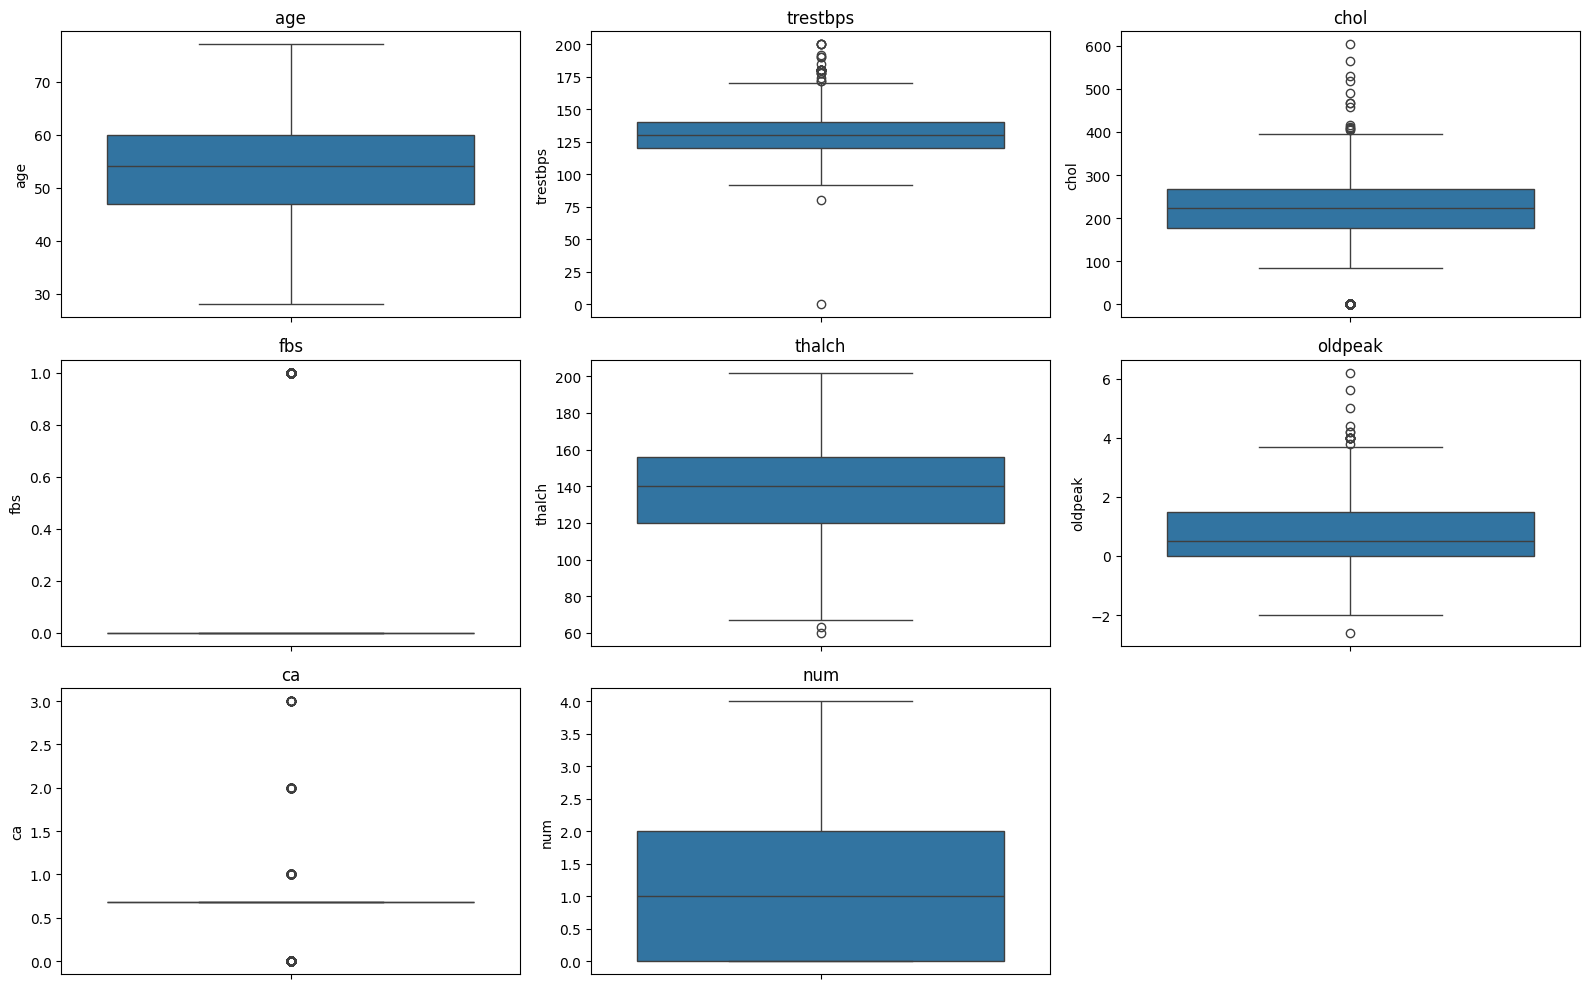

In [58]:
# Selecting numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating boxplots for each numerical column
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [59]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in numerical_columns:
    df = cap_outliers(df, col)

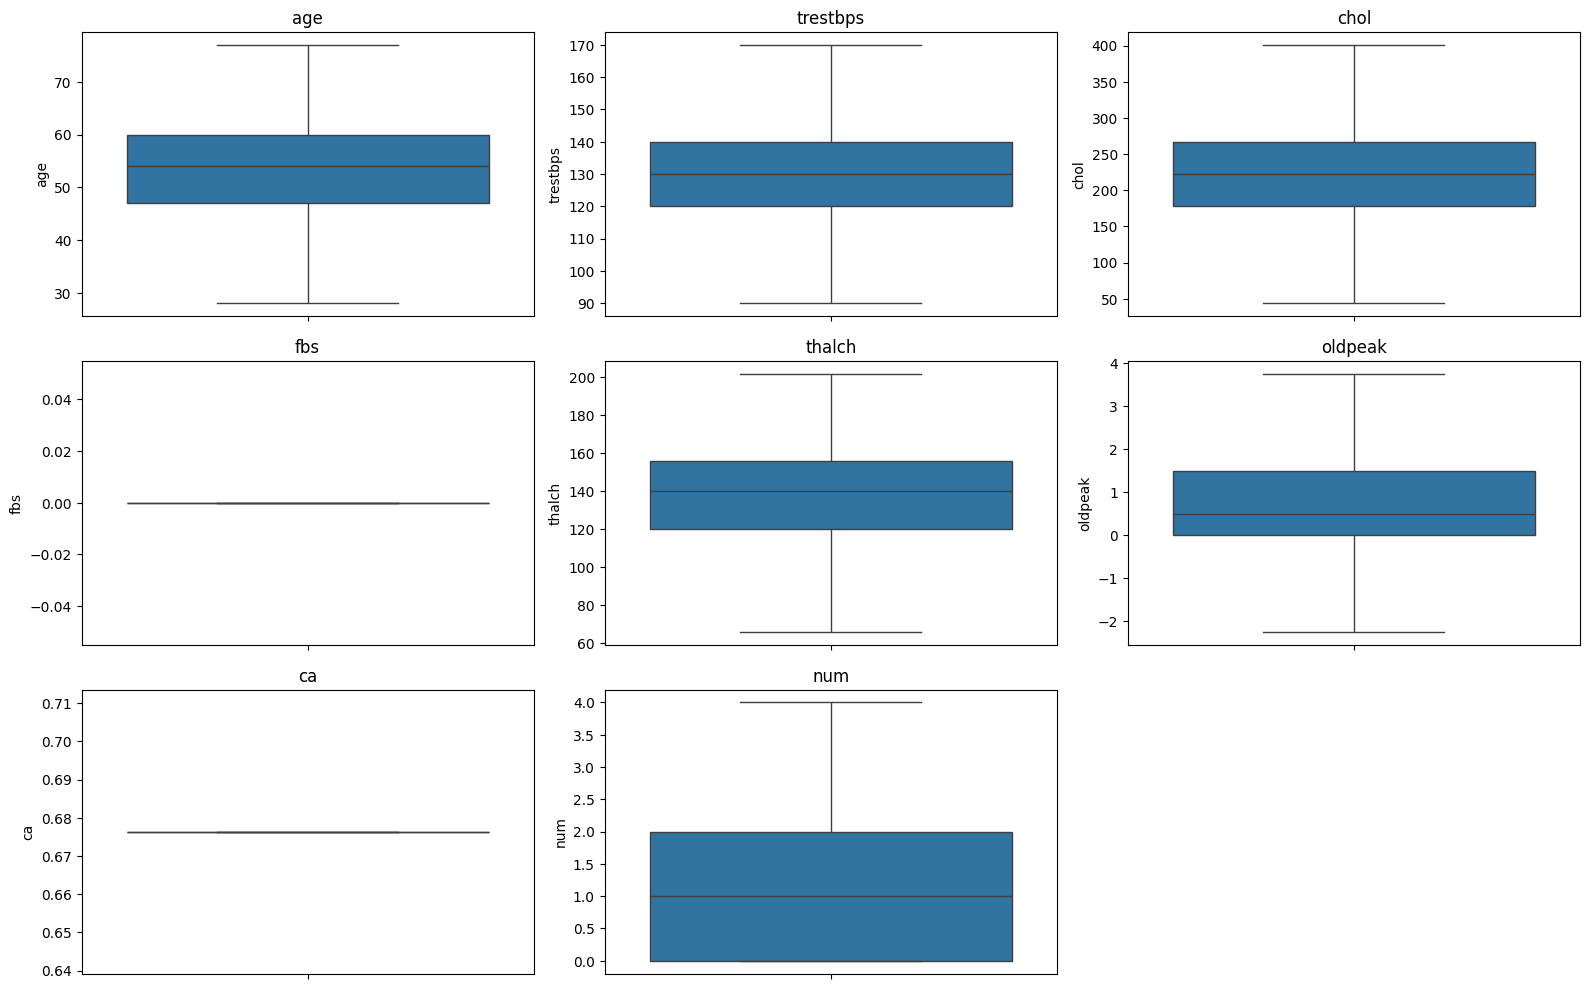

In [60]:
# Selecting numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating boxplots for each numerical column
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [61]:
# train test split

X = df.drop('num', axis=1)
y = df['num']

# encode the categorical columns using for lopp and le
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [92]:
y.unique()

array([0., 2., 1., 3., 4.])

In [94]:
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.5489130434782609
Precision score:  0.5489130434782609
Recall score:  0.5489130434782609
F1 score:  0.5489130434782609
Confusion Matrix:
[[59  8  6  1  1]
 [15 25  7  7  0]
 [ 2  9  6  7  1]
 [ 5  7  2 10  2]
 [ 1  0  0  2  1]]


In [95]:
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.5489130434782609
Precision score:  0.5489130434782609
Recall score:  0.5489130434782609
F1 score:  0.5489130434782609
Confusion Matrix:
[[68  5  2  0  0]
 [21 27  3  3  0]
 [ 2 14  2  7  0]
 [ 6 11  4  4  1]
 [ 0  1  1  2  0]]


In [96]:
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.6032608695652174
Precision score:  0.6032608695652174
Recall score:  0.6032608695652174
F1 score:  0.6032608695652174
Confusion Matrix:
[[66  5  4  0  0]
 [15 28  8  3  0]
 [ 3  9  9  4  0]
 [ 4 12  3  7  0]
 [ 0  2  0  1  1]]


In [102]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
KNNclassifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNNclassifier.fit(X_train, y_train)
#Predicting the test set result  
y_pred= KNNclassifier.predict(X_test)  

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346
Confusion Matrix:
[[61 13  1  0  0]
 [25 18  9  2  0]
 [13  9  2  1  0]
 [11 11  3  0  1]
 [ 1  2  0  0  1]]


In [98]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)
y_pred_SVM = SVMclassifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346
Confusion Matrix:
[[61 13  1  0  0]
 [25 18  9  2  0]
 [13  9  2  1  0]
 [11 11  3  0  1]
 [ 1  2  0  0  1]]


In [99]:
# --- Applying Gradient Boosting ---
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, min_samples_leaf=20)
GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346
Confusion Matrix:
[[61 13  1  0  0]
 [25 18  9  2  0]
 [13  9  2  1  0]
 [11 11  3  0  1]
 [ 1  2  0  0  1]]


In [100]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346
Confusion Matrix:
[[61 13  1  0  0]
 [25 18  9  2  0]
 [13  9  2  1  0]
 [11 11  3  0  1]
 [ 1  2  0  0  1]]


In [101]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



Accuracy score:  0.44565217391304346
Precision score:  0.44565217391304346
Recall score:  0.44565217391304346
F1 score:  0.44565217391304346
Confusion Matrix:
[[61 13  1  0  0]
 [25 18  9  2  0]
 [13  9  2  1  0]
 [11 11  3  0  1]
 [ 1  2  0  0  1]]


           Model  Accuracy
0             dt  0.421739
1             rf  0.469565
2            xgb  0.432609
3  KNNclassifier  0.423913
4  SVMclassifier  0.436957
5   GBclassifier  0.461957
6     svm_linear  0.528261
7        svm_rbf  0.436957


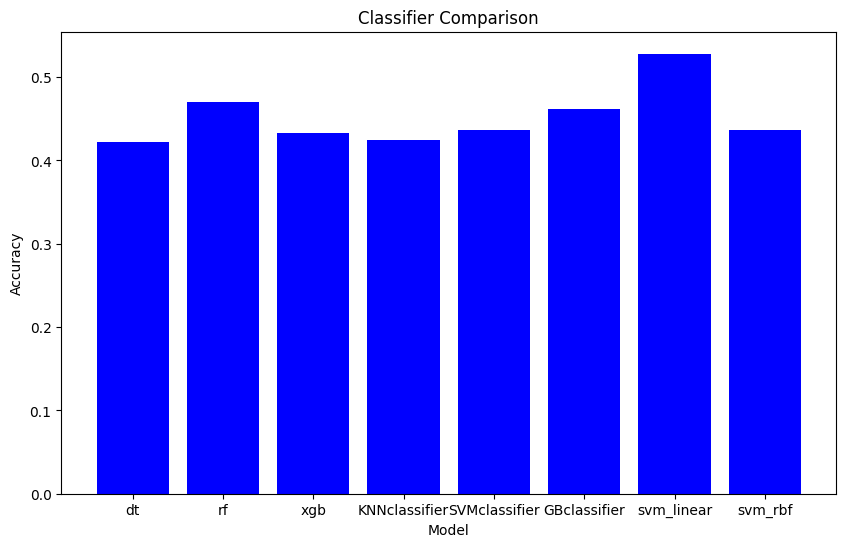

In [109]:

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


# Assuming you have your data and labels (X, y) and you want to compare these classifiers
classifiers = {
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'xgb': XGBClassifier(),
    'KNNclassifier': KNeighborsClassifier(),
    'SVMclassifier': SVC(),
    'GBclassifier': GradientBoostingClassifier(),
    'svm_linear': SVC(kernel='linear'),
    'svm_rbf': SVC(kernel='rbf')
}

# Create a list to store the results
results = []

# Iterate through each classifier
for model_name, classifier in classifiers.items():
    # Calculate cross-validated accuracy
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Accuracy': scores.mean()
    })

# Create a dataframe from the list of results
results_df = pd.DataFrame(results)

# Print the results dataframe
print(results_df)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='blue')
plt.title('Classifier Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


Thanks.
😊 

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀 ____ Mahmoud Mohamed Rady.     ___ Junior Data Scientist  (ML Eng) ___
12/2023 ____ 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀

https://www.linkedin.com/in/mahmoud-rady-084426243